# Clasificador de aplicaciones de Google play store apps

# Integrantes:

*   Joan Sebastian Patiño Jaimes-2202052
*   Jorge Eduardo Suarez Cortes-2205561
*   Cristian Stivens Villareal Parra-2204132

## Link:https://www.kaggle.com/datasets/lava18/google-play-store-apps

## Informacion general del dataset:

Contexto
Si bien muchos conjuntos de datos públicos (en Kaggle y similares) proporcionan datos de la App Store de Apple, no hay muchos conjuntos de datos homólogos disponibles para las aplicaciones de Google Play Store en ningún lugar de la web. Al profundizar más, descubrí que la página de App Store implementa una estructura similar a un apéndice muy bien indexada para permitir un web scraping simple y fácil. Por otro lado, Google Play Store utiliza técnicas modernas y sofisticadas (como la carga dinámica de páginas) utilizando JQuery, lo que hace que el scraping sea más desafiante.

Contenido
Cada aplicación (fila) tiene valores de categoría, calificación, tamaño,reselas,tipo de juego(Gratis o pago) y más.


In [32]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
data = pd.read_csv('/content/drive/MyDrive/ia Proyecto/googleplaystore.csv')
data = pd.DataFrame(data)

In [34]:
data.head(1000)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,My Talking Pet,ENTERTAINMENT,4.6,6238,Varies with device,"100,000+",Paid,$4.99,Everyone,Entertainment,"June 30, 2018",Varies with device,Varies with device
996,Funny Pics,ENTERTAINMENT,3.9,9941,Varies with device,"1,000,000+",Free,0,Teen,Entertainment,"July 7, 2017",Varies with device,Varies with device
997,Funny Quotes Free,ENTERTAINMENT,4.2,23666,3.6M,"1,000,000+",Free,0,Teen,Entertainment,"May 4, 2018",8.1,4.0 and up
998,LOL Pics (Funny Pictures),ENTERTAINMENT,4.4,67554,7.7M,"1,000,000+",Free,0,Teen,Entertainment,"September 15, 2015",4.0,2.3.3 and up


In [35]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Primera entrega

In [37]:
# @title Areglar nombre de las variables | puede que el codigo posterior no funcione por haberlo ejecutado aqui
data.rename(columns={'Content Rating':'Content_Rating'},inplace=True)
data.rename(columns={'Android Ver':'Android_Ver'},inplace=True)
data.rename(columns={'Last Updated':'Last_Updated'},inplace=True)
data.rename(columns={'Type':'tipo'},inplace=True)

In [38]:
# @title Areglo de la variable 'size' a numerica | puede que no funcione la tranformacion posterior
def convert_size(size_str):
    if size_str == 'Varies with device':
        return 1000000  # Reemplaza "Varies with device" con 1000000
    elif size_str.endswith('M'):
        return int(float(size_str.replace('M', '')) * 1000000)
    elif size_str.endswith('k'):
        return int(float(size_str.replace('k', '')) * 1000)
    else:
        return size_str

data['Size'] = data['Size'].apply(convert_size)
data['Size'] = pd.to_numeric(data['Size'], errors='coerce', downcast='integer')

In [39]:
# @title Areglo de la variable 'Installs' a numerica | puede que el codigo posterior no funcione
valid_rows = data['Installs'].str.replace('+', '').str.replace(',', '').str.isnumeric()
data.loc[valid_rows, 'Installs'] = data.loc[valid_rows, 'Installs'].str.replace('+', '').str.replace(',', '').astype(int)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce', downcast='integer')

<ipython-input-39-7c79679b570e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  valid_rows = data['Installs'].str.replace('+', '').str.replace(',', '').str.isnumeric()
<ipython-input-39-7c79679b570e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.loc[valid_rows, 'Installs'] = data.loc[valid_rows, 'Installs'].str.replace('+', '').str.replace(',', '').astype(int)


In [40]:
# @title Este es el codigo que puede falllar | lo hice asi porque es que transformar las variables cualitativas a cuantitativas todavia no era necesario
#FlightCode	DepartingCity	DepartingTime	ArrivingCity	ArrivingTime	Duration
k=0
for i in data.Category.unique():
  data.Category.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Content_Rating.unique():
  data.Content_Rating.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.tipo.unique():
  data.tipo.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Genres.unique():
  data.Genres.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Genres.unique():
  data.Genres.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Android_Ver.unique():
  data.Android_Ver.replace(i, k, inplace = True)
  k = k+1


In [41]:
data['Reviews'] = data['Reviews'].str.replace('M', '')
data['Reviews'] = data['Reviews'].astype(float)
data['Reviews'] = data['Reviews'].astype(int)

In [42]:
data = data[data['Price'].str.isnumeric()]
data['Price'] = data['Price'].astype(int)

<ipython-input-42-6c31896d284b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].astype(int)


## Dataset modificado

In [43]:
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,tipo,Price,Content_Rating,Genres,Last_Updated,Current Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19000000.0,10000.0,0,0,0.0,0,"January 7, 2018",1.0.0,0
1,Coloring book moana,0,3.9,967,14000000.0,500000.0,0,0,0.0,1,"January 15, 2018",2.0.0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8700000.0,5000000.0,0,0,0.0,0,"August 1, 2018",1.2.4,0
3,Sketch - Draw & Paint,0,4.5,215644,25000000.0,50000000.0,0,0,1.0,0,"June 8, 2018",Varies with device,1
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2800000.0,100000.0,0,0,0.0,2,"June 20, 2018",1.1,2
5,Paper flowers instructions,0,4.4,167,5600000.0,50000.0,0,0,0.0,0,"March 26, 2017",1.0,3
6,Smoke Effect Photo Maker - Smoke Editor,0,3.8,178,19000000.0,50000.0,0,0,0.0,0,"April 26, 2018",1.1,0
7,Infinite Painter,0,4.1,36815,29000000.0,1000000.0,0,0,0.0,0,"June 14, 2018",6.1.61.1,1
8,Garden Coloring Book,0,4.4,13791,33000000.0,1000000.0,0,0,0.0,0,"September 20, 2017",2.9.2,4
9,Kids Paint Free - Drawing Fun,0,4.7,121,3100000.0,10000.0,0,0,0.0,2,"July 3, 2018",2.8,0


# Graficas

<ipython-input-44-3e3efddb1528>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

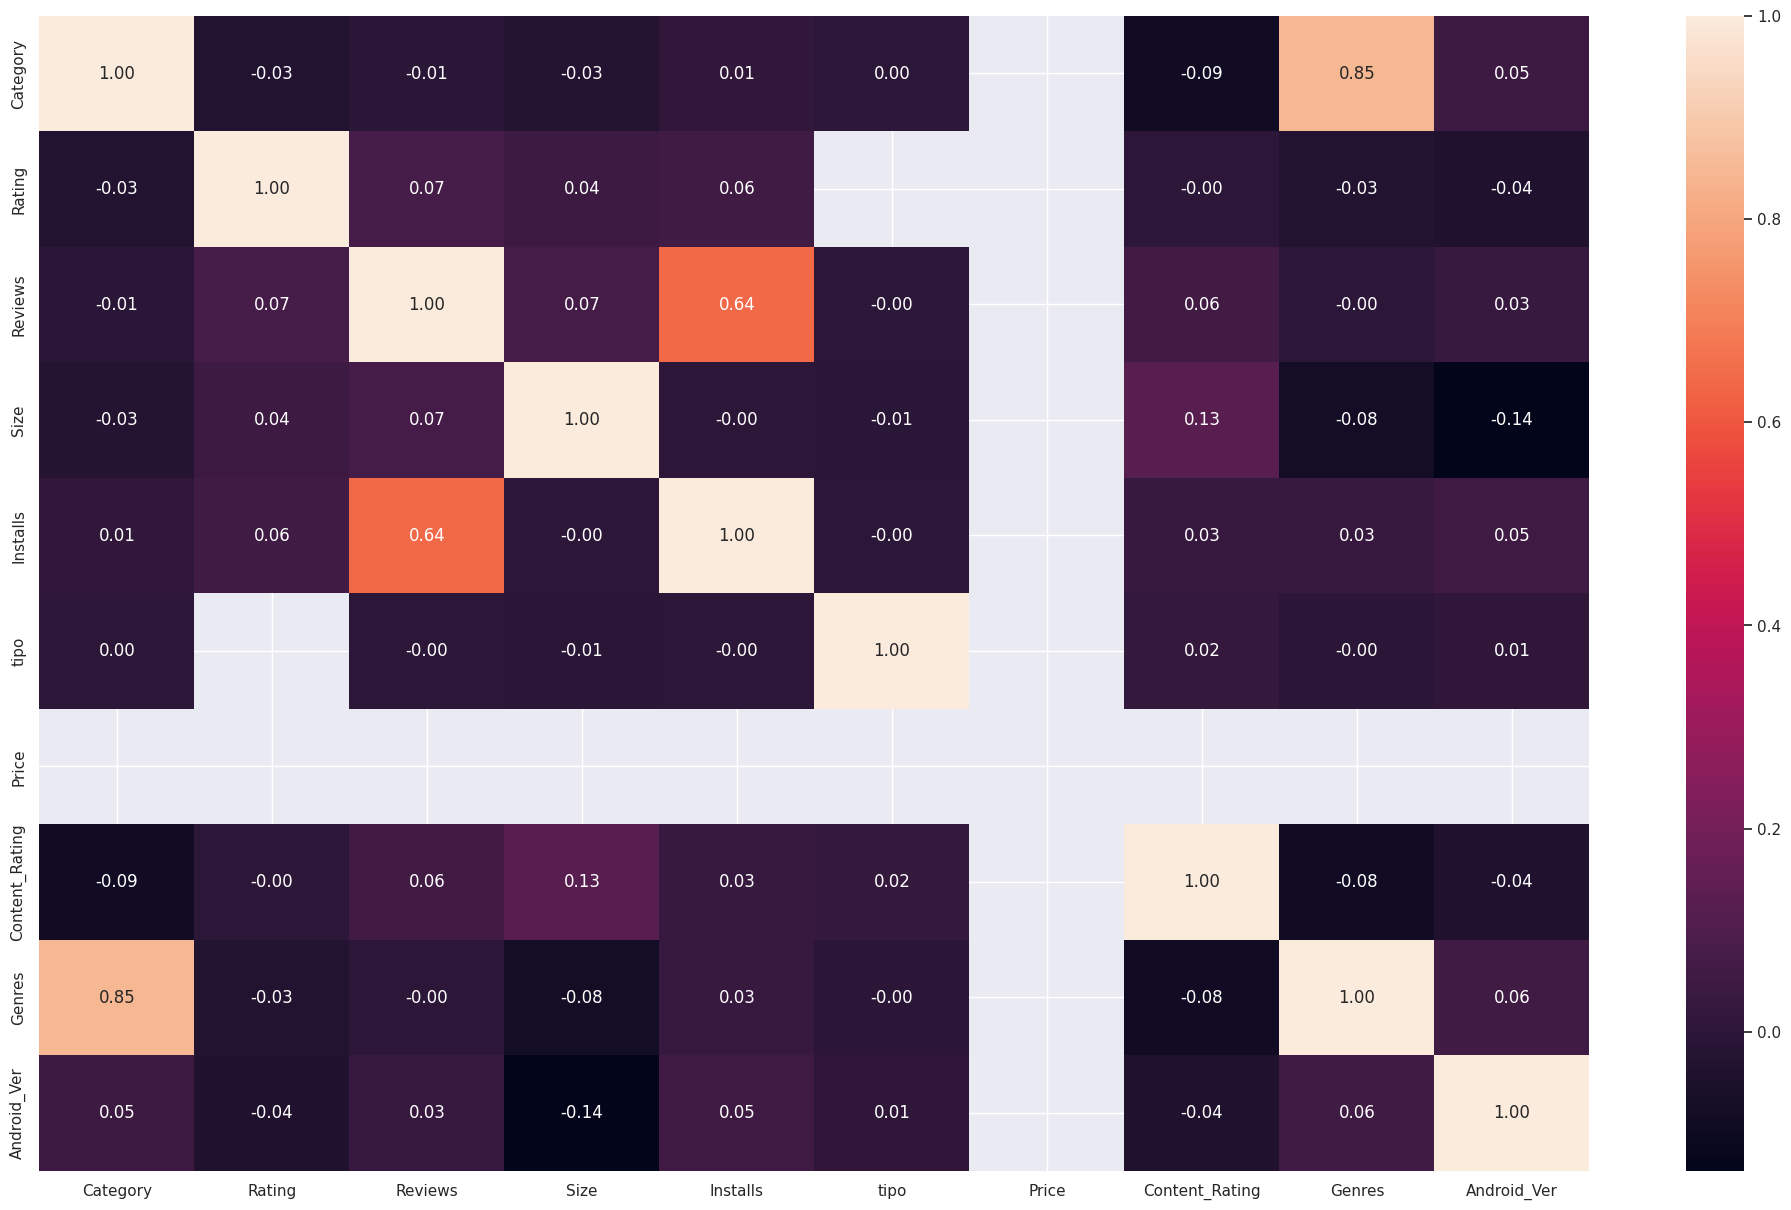

In [44]:
corr = data.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(corr, annot=True, fmt=".2f")

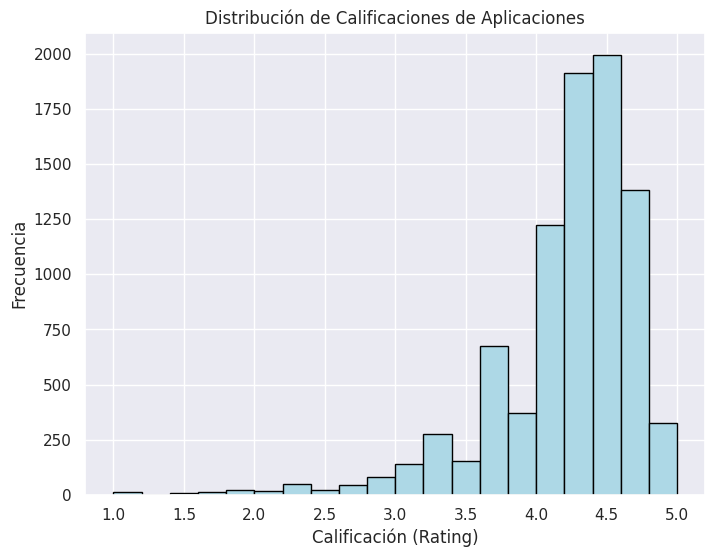

In [45]:
# Supongamos que tienes un DataFrame llamado df con tus datos

# Crear un histograma de calificaciones
plt.figure(figsize=(8, 6))
plt.hist(data['Rating'], bins=20, color='lightblue', edgecolor='black')
plt.xlabel('Calificación (Rating)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones de Aplicaciones')
plt.show()


## h

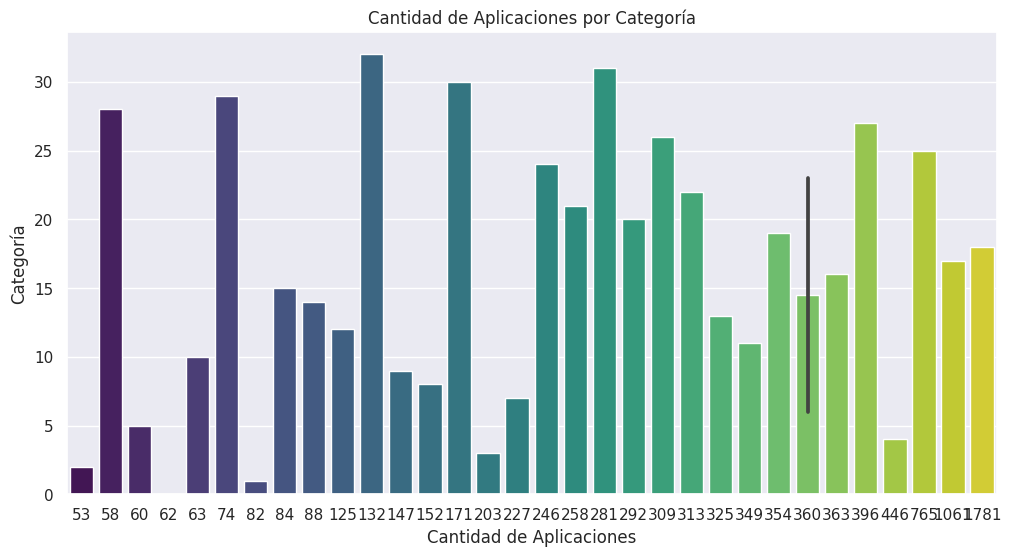

In [46]:
# Contar la cantidad de aplicaciones por categoría
category_counts = data['Category'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.xlabel('Cantidad de Aplicaciones')
plt.ylabel('Categoría')
plt.title('Cantidad de Aplicaciones por Categoría')
plt.show()


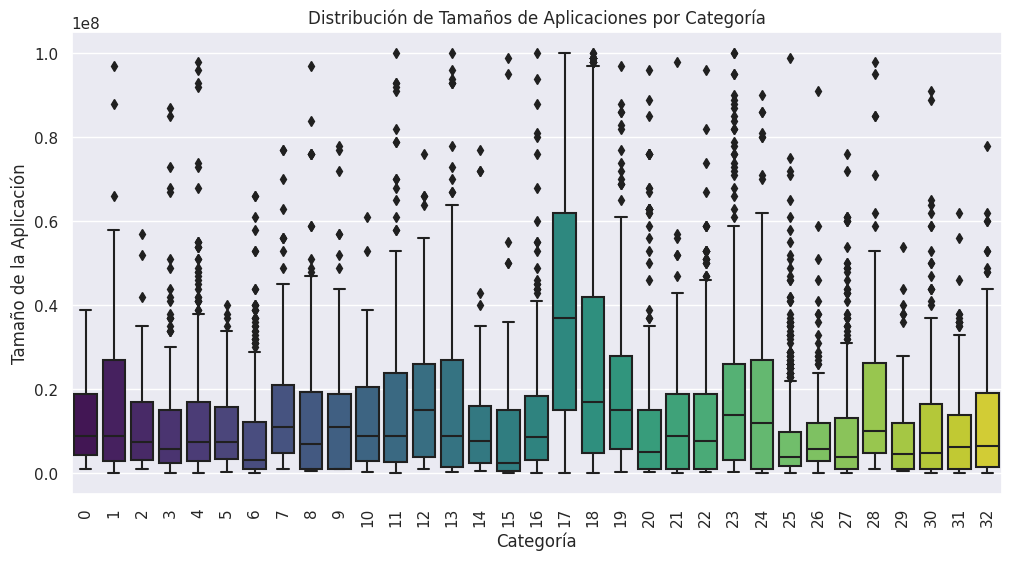

In [47]:
# @title Crear un diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Size', data=data, palette='viridis')
plt.xlabel('Categoría')
plt.ylabel('Tamaño de la Aplicación')
plt.title('Distribución de Tamaños de Aplicaciones por Categoría')
plt.xticks(rotation=90)
plt.show()


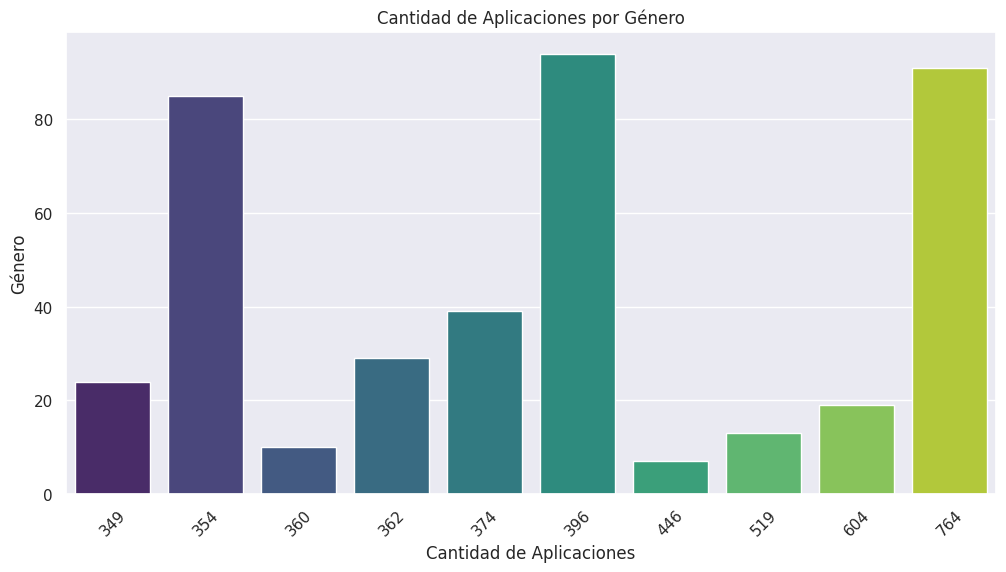

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de aplicaciones por género
genre_counts = data['Genres'].value_counts()[:10]  # Tomamos las 10 categorías más comunes

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel('Cantidad de Aplicaciones')
plt.ylabel('Género')
plt.title('Cantidad de Aplicaciones por Género')
plt.xticks(rotation=45)
plt.show()


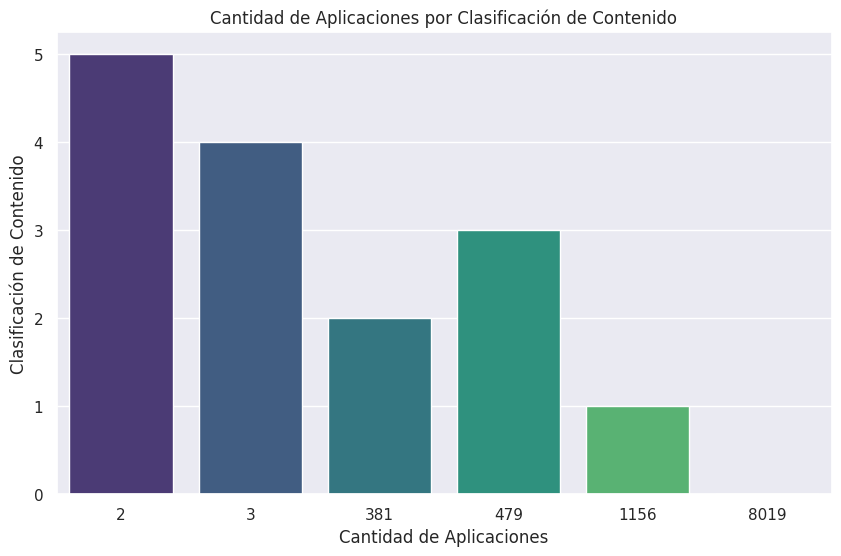

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de aplicaciones por clasificación de contenido
content_rating_counts = data['Content_Rating'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=content_rating_counts.values, y=content_rating_counts.index, palette='viridis')
plt.xlabel('Cantidad de Aplicaciones')
plt.ylabel('Clasificación de Contenido')
plt.title('Cantidad de Aplicaciones por Clasificación de Contenido')
plt.show()


<ipython-input-50-8afbf8dde64c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Installs', data=data, estimator=sum, ci=None, palette='viridis')


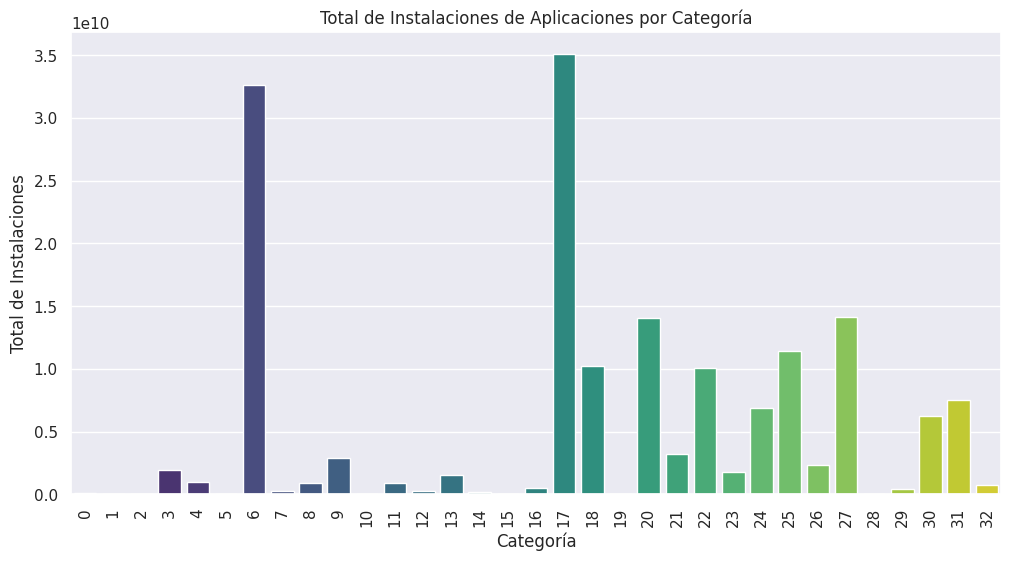

In [50]:
# @title Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Installs', data=data, estimator=sum, ci=None, palette='viridis')
plt.xlabel('Categoría')
plt.ylabel('Total de Instalaciones')
plt.title('Total de Instalaciones de Aplicaciones por Categoría')
plt.xticks(rotation=90)
plt.show()


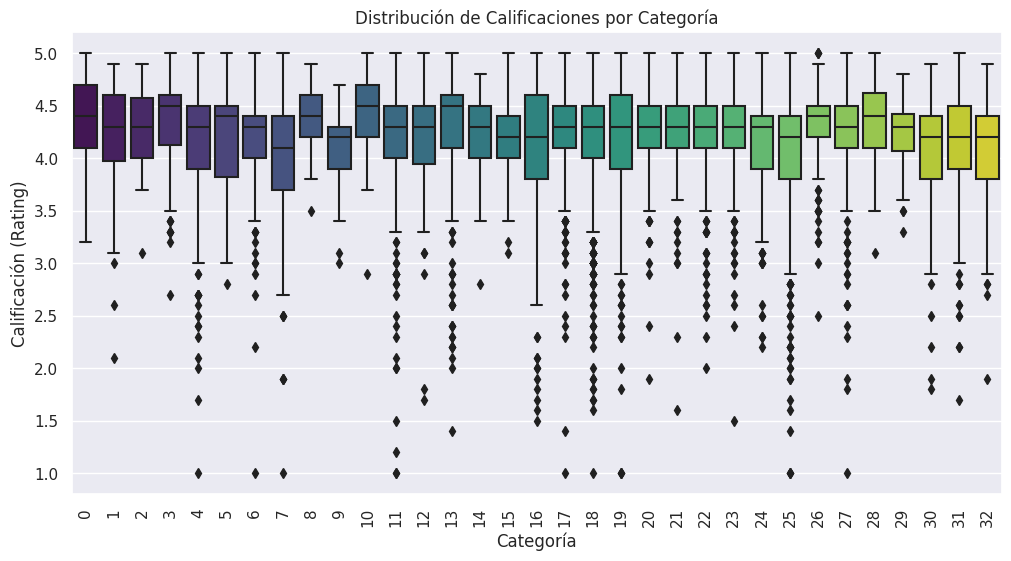

In [51]:
# Crear un diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=data, palette='viridis')
plt.xlabel('Categoría')
plt.ylabel('Calificación (Rating)')
plt.title('Distribución de Calificaciones por Categoría')
plt.xticks(rotation=90)
plt.show()


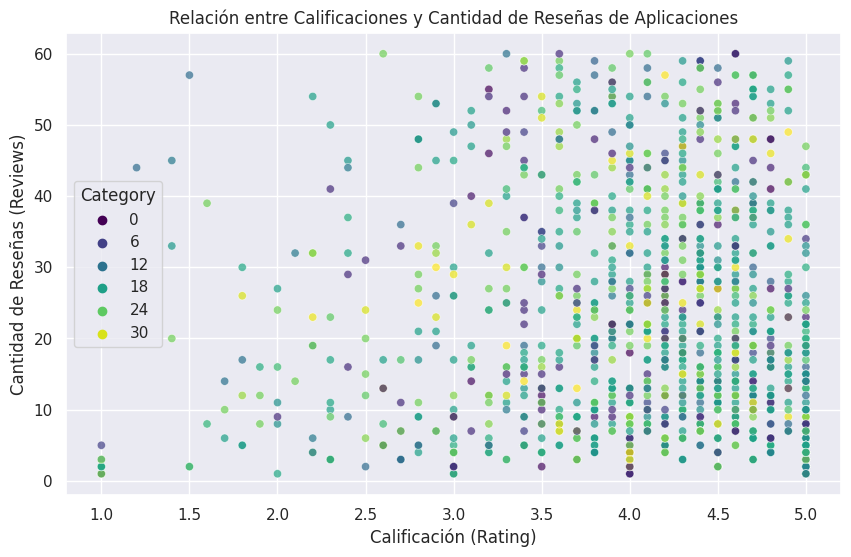

In [52]:
# Filtrar las aplicaciones con 60 o menos reseñas
data_filtered = data[data['Reviews'] <= 60]

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Reviews', data=data_filtered, hue='Category', palette='viridis', alpha=0.7)
plt.xlabel('Calificación (Rating)')
plt.ylabel('Cantidad de Reseñas (Reviews)')
plt.title('Relación entre Calificaciones y Cantidad de Reseñas de Aplicaciones')
plt.show()


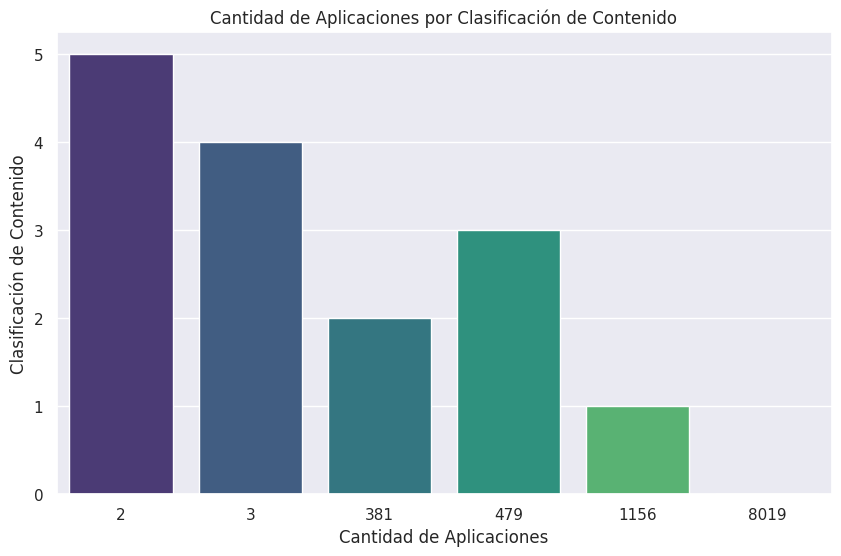

In [53]:
# Contar la cantidad de aplicaciones por clasificación de contenido
content_rating_counts = data['Content_Rating'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=content_rating_counts.values, y=content_rating_counts.index, palette='viridis')
plt.xlabel('Cantidad de Aplicaciones')
plt.ylabel('Clasificación de Contenido')
plt.title('Cantidad de Aplicaciones por Clasificación de Contenido')
plt.show()


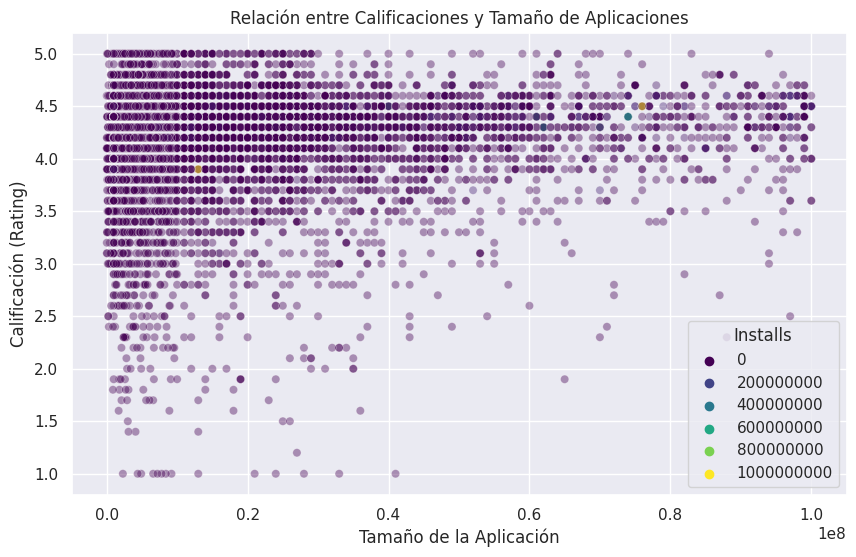

In [54]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rating', data=data, hue='Installs', palette='viridis', alpha=0.4)
plt.xlabel('Tamaño de la Aplicación')
plt.ylabel('Calificación (Rating)')
plt.title('Relación entre Calificaciones y Tamaño de Aplicaciones')
plt.show()


# Random Forest,Decition tree, support vector para clasificacio


In [55]:
#@title 2. **Librerias para segunda entrega** { display-mode: "form" }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
sns.set_theme()
pd.__version__

'1.5.3'

In [56]:
# @title Areglar nombre de las variables
data = pd.read_csv('/content/drive/MyDrive/ia Proyecto/googleplaystore.csv')
data = pd.DataFrame(data)
data.rename(columns={'Content Rating':'Content_Rating'},inplace=True)
data.rename(columns={'Android Ver':'Android_Ver'},inplace=True)
data.rename(columns={'Last Updated':'Last_Updated'},inplace=True)
data.rename(columns={'Type':'tipo'},inplace=True)

k=0
for i in data.Category.unique():
  data.Category.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Content_Rating.unique():
  data.Content_Rating.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.tipo.unique():
  data.tipo.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Genres.unique():
  data.Genres.replace(i, k, inplace = True)
  k = k+1
k=0
for i in data.Android_Ver.unique():
  data.Android_Ver.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.App.unique():
  data.App.replace(i, k, inplace = True)
  k = k+1

k=0
for i in data.Last_Updated.unique():
  data.Last_Updated.replace(i, k, inplace = True)
  k = k+1
data.rename(columns={'Current Ver':'Current_Ver'},inplace=True)
k=0
for i in data.Current_Ver.unique():
  data.Current_Ver.replace(i, k, inplace = True)
  k = k+1
# Eliminar la columna 'Size' de 'data'
data = data.drop(columns=['Size'])
data = data.drop(columns=['Reviews'])

# Eliminar el símbolo de dólar y otros caracteres no numéricos
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = data['Price'].str.replace('Everyone', '0')  # Reemplaza 'Everyone' con '0' u otro valor apropiado

# Convertir la columna 'Price' a tipo float
data['Price'] = data['Price'].astype(float)


data['Installs'] = data['Installs'].str.rstrip('+')

data['Installs'] = data['Installs'].str.replace(',', '')

data = data[data['Installs'] != 'Free']
# Convertir la columna 'Installs' a tipo float
data['Installs'] = data['Installs'].astype(float)

# Imputar valores nulos con la media
data_imputada = data.fillna(data.mean())

data_imputada = data_imputada.drop(columns=['Android_Ver'])
data_imputada = data_imputada.drop(columns=['Current_Ver'])
data_imputada = data_imputada.drop(columns=['Last_Updated'])

# Asignar las variables "X" y "y"
y = data_imputada["Rating"].values
X = data_imputada.drop("Rating", axis = 1).values
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

<ipython-input-56-fb3d39ed67dd>:52: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')


In [57]:
X_df = pd.DataFrame(X)
print(X_df.head())

data_imputada.head()

     0    1           2    3    4    5    6
0  0.0  0.0     10000.0  0.0  0.0  0.0  0.0
1  1.0  0.0    500000.0  0.0  0.0  0.0  1.0
2  2.0  0.0   5000000.0  0.0  0.0  0.0  0.0
3  3.0  0.0  50000000.0  0.0  0.0  1.0  0.0
4  4.0  0.0    100000.0  0.0  0.0  0.0  2.0


,App,Category,Rating,Installs,tipo,Price,Content_Rating,Genres
0,0,0,4.1,10000.0,0,0.0,0.0,0
1,1,0,3.9,500000.0,0,0.0,0.0,1
2,2,0,4.7,5000000.0,0,0.0,0.0,0
3,3,0,4.5,50000000.0,0,0.0,1.0,0
4,4,0,4.3,100000.0,0,0.0,0.0,2


In [58]:
# Supongamos que has realizado modificaciones en tu conjunto de datos original 'df' y lo has asignado a 'datos_modificados'
datos_modificados = data.copy()  # Realiza las modificaciones necesarias en df y guarda el resultado en datos_modificados

# Guardar el DataFrame modificado en un archivo CSV en Google Colab
ruta_temporal = '/content/datos_modificados.csv'
datos_modificados.to_csv(ruta_temporal, index=False)

# Descargar el archivo CSV modificado a tu equipo local
from google.colab import files
files.download(ruta_temporal)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
 #@title *Graficas de dispersión*
sns.set(rc={'figure.figsize': (12, 12)})
sns.pairplot(data_imputada, diag_kind="hist")
plt.show()

print("Dimensiones del DataFrame:", data_imputada.shape)
print("Primeras filas del DataFrame:")
print(data_imputada.head())

In [ ]:
# @title Decision Tree Classifier
def show_curve1():
  y = data_imputada["Rating"].values
  X = data_imputada.drop("Rating", axis = 1).values
  le = preprocessing.LabelEncoder()
  y = le.fit_transform(y)


  np.random.seed(10)
  means, stds = [], []
  tpr_values, tnr_values = [], []  # Listas para almacenar los valores de TPR y TNR

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0

  nfolds_range = range(2, 30)
  for nfolds in nfolds_range:
    est = DecisionTreeClassifier(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(n_splits=10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))

    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()

  for nfolds in nfolds_range:
    print(f"Para {nfolds} folds:")
    print(f"  Accuracy: {means[nfolds-2]}")
    print(f"  Desviación estándar: {stds[nfolds-2]}")
    print("\n")

  print(f"Mejor valor de max_depth: {best_max_depth}")
  print(f"Mejor Accuracy: {best_accuracy}")
  print(f"Menor Desviación Estándar: {best_std}")

# Mostrar la curva y obtener el accuracy, TPR y TNR
show_curve1()


In [62]:
#@title  **Random Forest Classifier**

def show_RandomForestClassifier():
  np.random.seed(10)
  means, stds = [], []

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0

  nfolds_range = range(2,20)
  for nfolds in nfolds_range:
    est=RandomForestClassifier(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]

  print(f"Mejor valor de max_depth: {best_max_depth}")
  print(f"Mejor Accuracy: {best_accuracy}")
  print(f"Menor Desviación Estándar: {best_std}")

show_RandomForestClassifier()

Mejor valor de max_depth: 19
Mejor Accuracy: 0.3187269372693727
Menor Desviación Estándar: 0.008557485168916468


In [ ]:
#@title  **SVC linear**
def show_SVC():
  np.random.seed(10)
  means, stds = [], []

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0

  nfolds_range = range(2,20)
  for nfolds in nfolds_range:
    est=SVC(kernel='linear')
    print("nfolds",nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    print(f"Accuracy para {nfolds} folds - Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")

    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()

  print(f"Mejor valor de max_depth: {best_max_depth}")
  print(f"Mejor Accuracy: {best_accuracy}")
  print(f"Menor Desviación Estándar: {best_std}")

show_SVC()

In [ ]:
#@title  **SVC Poly**
def show_SVC():
  np.random.seed(10)
  means, stds = [], []

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0

  nfolds_range = range(2,5)
  for nfolds in nfolds_range:
    est=SVC(kernel='poly', degree=nfolds)
    print("nfolds",nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")


    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()

  print(f"Mejor valor de max_depth: {best_max_depth}")
  print(f"Mejor Accuracy: {best_accuracy}")
  print(f"Menor Desviación Estándar: {best_std}")

show_SVC()

In [ ]:
#@title *SVC RBF*
def show_SVC():
  np.random.seed(10)
  means, stds = [], []

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0

  nfolds_range = range(2,30)
  for nfolds in nfolds_range:
    est=SVC(kernel='rbf', degree=nfolds)
    print("nfolds",nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    print(f"Accuracy para {nfolds} folds - Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")

    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()

  print(f"Mejor valor de max_depth: {best_max_depth}")
  print(f"Mejor Accuracy: {best_accuracy}")
  print(f"Menor Desviación Estándar: {best_std}")

show_SVC()

# **RandomForest,DecisionTree, Support vector para clasificación**

In [ ]:
#@title  **RandomForestRegressor mean_squared_error**
def show_RandomForestRegressor():
  np.random.seed(10)
  means, stds = [], []
  nfolds_range = range(2,26)
  for nfolds in nfolds_range:
    est=RandomForestRegressor(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    print(f"Accuracy para {nfolds} folds - Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()

show_RandomForestRegressor()


In [ ]:
#@title  **RandomForestRegressor Root Mean Squared Error**
def show_RandomForestRegressor():
  np.random.seed(10)
  means, stds = [], []
  nfolds_range = range(2,26)
  for nfolds in nfolds_range:
    est=RandomForestRegressor(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
    s=np.sqrt(s)
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    print(f"Accuracy para {nfolds} folds - Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()

show_RandomForestRegressor()

In [ ]:
#@title  *RandomForestRegressor Mean Absolute Error*
def show_RandomForestRegressor():
  np.random.seed(10)
  means, stds = [], []
  nfolds_range = range(2,26)

  best_accuracy = 0
  best_std = float('inf')
  best_max_depth = 0
  for nfolds in nfolds_range:
    est=RandomForestRegressor(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_absolute_error))
    s=np.sqrt(s)
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    print(f"Accuracy para {nfolds} folds - Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")
    mean_accuracy = np.mean(s)
    std_accuracy = np.std(s)
    if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
      best_accuracy = mean_accuracy
      best_std = std_accuracy
      best_max_depth = nfolds

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()

  print(f"Mejor valor de max_depth: {best_max_depth}")
  print(f"Mejor Accuracy: {best_accuracy}")
  print(f"Menor Desviación Estándar: {best_std}")

show_RandomForestRegressor()

In [ ]:
#@title  **DecisionTreeRegressor mean_squared_error**
def show_DecisionTreeRegressor():
  np.random.seed(10)
  means, stds = [], []
  nfolds_range = range(2,26)
  for nfolds in nfolds_range:
    est=DecisionTreeRegressor(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    print(f"Accuracy para {nfolds} folds - Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()

show_DecisionTreeRegressor()

In [ ]:
#@title  **DecisionTreeRegressor Root Mean Squared Error**
def show_DecisionTreeRegressor():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,26)

    best_accuracy = 0
    best_std = float('inf')
    best_max_depth = 0

    for nfolds in nfolds_range:
        est=DecisionTreeRegressor(max_depth=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        s=np.sqrt(s)
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")
        mean_accuracy = np.mean(s)
        std_accuracy = np.std(s)
        if mean_accuracy > best_accuracy or (mean_accuracy == best_accuracy and std_accuracy < best_std):
          best_accuracy = mean_accuracy
          best_std = std_accuracy
          best_max_depth = nfolds
    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_DecisionTreeRegressor()

In [ ]:
#@title  **DecisionTreeRegressor Mean Absolute Erroe**
def show_DecisionTreeRegressor():
  np.random.seed(10)
  means, stds = [], []
  nfolds_range = range(2,26)
  for nfolds in nfolds_range:
    est=DecisionTreeRegressor(max_depth=nfolds)
    s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_absolute_error))
    s=np.sqrt(s)
    means.append(np.mean(s))
    stds.append(np.std(s))
    media = np.mean(s)
    std_dev = np.std(s)
    print(f"Accuracy para {nfolds} folds -  Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")

  means = np.r_[means]
  stds  = np.r_[stds]

  plt.plot(nfolds_range, means, label="mean", color="black")
  plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
  plt.xlabel("n folds")
  plt.ylabel("performance")
  plt.legend()

show_DecisionTreeRegressor()

In [ ]:
#@title  **SVR LINEAL mean_squared_error**
def show_SVR():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,3)
    for nfolds in nfolds_range:
        est=SVR(kernel='linear')
        print(nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds -  Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVR()

In [ ]:
#@title  **SVR LINEAL Root Mean Squared Error**
def show_SVR():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,3)
    for nfolds in nfolds_range:
        est=SVR(kernel='linear')
        print(nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        s=np.sqrt(s)
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVR()

In [ ]:
#@title  **SVR LINEAL Mean Absolute Erroe**
def show_SVR():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,4)
    for nfolds in nfolds_range:
        est=SVR(kernel='linear')
        print(nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_absolute_error))
        s=np.sqrt(s)
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVR()

In [ ]:
#@title  **SVR POLY mean_squared_error**
def show_SVR():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,9)
    for nfolds in nfolds_range:
        est=SVR(kernel='poly', degree=nfolds)
        print(nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds -  Accuracy: {means[nfolds-2]}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVR()

In [ ]:
#@title  **SVR POLY Root Mean Squared Error**
def show_SVR():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,9)
    for nfolds in nfolds_range:
        est=SVR(kernel='poly', degree=nfolds)
        print(nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        s=np.sqrt(s)
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVR()

In [ ]:
#@title  **SVR POLY Mean Absolute Erroe**
def show_SVR():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,9)
    for nfolds in nfolds_range:
        est=SVR(kernel='poly', degree=nfolds)
        print(nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_absolute_error))
        s=np.sqrt(s)
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVR()

In [ ]:
#@title  **SVR rbf mean_squared_error**
def show_SVR():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,9)
    for nfolds in nfolds_range:
        est=SVR(kernel='rbf', degree=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVR()

In [ ]:
#@title  **SVR rbf Root Mean Squared Error**
def show_SVR():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,9)
    for nfolds in nfolds_range:
        est=SVR(kernel='rbf', degree=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
        s=np.sqrt(s)
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVR()

In [ ]:
#@title  **SVR POLY Mean Absolute Erroe**
def show_SVR():
    np.random.seed(10)
    means, stds = [], []
    nfolds_range = range(2,9)
    for nfolds in nfolds_range:
        est=SVR(kernel='rbf', degree=nfolds)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_absolute_error))
        s=np.sqrt(s)
        means.append(np.mean(s))
        stds.append(np.std(s))
        media = np.mean(s)
        std_dev = np.std(s)
        print(f"Accuracy para {nfolds} folds - Media: {media}, Desviación estándar: {std_dev}")

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

show_SVR()